In [1]:
# %load mymodule

#increase the width of display to full window
from IPython.display import display, HTML
display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))


# interactivity to print all output in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# increase the size of horizontal and vertical display in output
import numpy as np
import pandas as pd
pd.set_option("display.max_columns",999)
pd.set_option("display.max_rows",999)



In [2]:
## Import Libraries
import pandas as pd                               
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib import rcParams
%matplotlib inline


In [3]:
df = pd.read_excel("Stat-Data.xlsx")

In [4]:
df

,V,teta,Distance
0,10,0,0.000000
1,20,5,7.087681
2,30,10,31.410013
3,40,15,81.632653
4,10,20,6.559057
5,20,25,31.267120
6,30,30,79.532945
7,40,35,153.419203
8,10,40,10.049059
9,20,45,40.816327


In [5]:
# define input as X
X = df[['V', 'teta']]

In [6]:
#define output as y
y = df['Distance']

In [7]:
## Creating and Training the Model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Model Evaluation

In [8]:
lm.score(X,y)

0.67113049361836041

## Model Coefficients

In [9]:
## print the intercept
print(lm.intercept_)

-33.8051359452


In [10]:
## print the coefficients
print(lm.coef_)

[ 3.57839602 -0.14828519]


## Linear Model equation

![FirstOrder.PNG](./FirstOrder.PNG)

## Plot data

### Select some range of values for teta

In [11]:
teta_arr = []
for i in range (0,95,5):
    teta_arr.append(i)
    
teta_arr
    

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90]

### Set Velocity

In [66]:
velocity = 25    # for plotting comparison lets use a fix velocity

### Find actual distance from mathematical model

In [67]:

act_dist=[]
for teta in teta_arr:
    alpha = (teta*math.pi)/180
    distance = (velocity*velocity)*(math.sin(2*alpha))/9.8
    act_dist.append(distance)

# act_dist

### data from linear model

In [68]:

ml_1 = []

for teta in teta_arr:
    dist = lm.intercept_  + lm.coef_[0]*velocity + lm.coef_[1]*teta
    ml_1.append(dist)
    
#ml_1   
    

In [69]:

rcParams['figure.figsize'] = 6,5
sns.set_style('whitegrid')

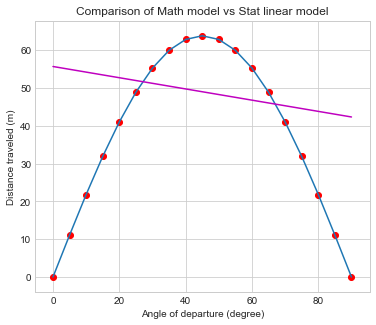

In [70]:
plt.xlabel('Angle of departure (degree)')
plt.ylabel('Distance traveled (m)')
plt.title ('Comparison of Math model vs Stat linear model')
plt.plot(teta_arr, act_dist)
plt.plot(teta_arr, ml_1,color='m')
plt.scatter(df['teta'],act_dist,color='r');


## Second Order curve

In [71]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [72]:
X1 = X.copy()     #input 

In [73]:
X1['V']=velocity  # set input velocity constant value
    

In [74]:
poly = PolynomialFeatures(degree=2)
X_ = poly.fit_transform(X)
predict_ = poly.fit_transform(X1)


In [75]:
clf = linear_model.LinearRegression()
clf.fit(X_, y)
ml_2 = clf.predict(predict_)
#print (ml_2)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Model evaluation of the second order curve

In [76]:
clf.score(X_,y)

0.89302624709918987

### Coeeficients of the second order model

In [77]:
print(clf.intercept_)
print(clf.coef_)


-15.5093917242
[ 0.         -1.56064843  2.42956102  0.09345332  0.00598795 -0.02971904]


# Second order Polynomail model

![SecondOrder1.PNG](./SecondOrder1.PNG)

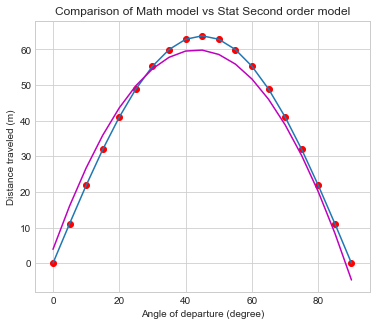

In [78]:
plt.xlabel('Angle of departure (degree)');
plt.ylabel('Distance traveled (m)');
plt.title ('Comparison of Math model vs Stat Second order model');
plt.plot(teta_arr, act_dist);
plt.plot(teta_arr, ml_2,color='m')
plt.scatter(df['teta'],act_dist,color='r');
